In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 210
sns.set_theme(style = 'darkgrid', palette = 'rainbow')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [4]:
training_data = pd.read_csv(r"F:\Krishna\Excel R\Data Scientist\Assignments\XGBM & LGBM\Titanic_train.csv")
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
testing_data = pd.read_csv(r"F:\Krishna\Excel R\Data Scientist\Assignments\XGBM & LGBM\Titanic_test.csv")
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
training_data = training_data.drop(columns = ['Survived'])
training_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
training_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
testing_data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

First of all, let's prepare the data for model building.

EDA

In [10]:
training_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
training_data.describe(include = object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [16]:
testing_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
testing_data.describe(include = object)

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


We can see we have missing values in few columns.

DataType

In [13]:
training_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
training_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
testing_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

All the datatypes are correct.

Duplicates

In [19]:
training_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [20]:
training_data.duplicated().sum()

0

In [21]:
testing_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [22]:
testing_data.duplicated().sum()

0

There are no duplicate values.

Missing Value Imputation

In [24]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [26]:
training_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see we have missing values in Age, Cabin and Embarked columns.

In [28]:
training_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
training_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

As we can see there are only two null values in Embarked column, there fore we will remove those two rows with null values.

In [43]:
training_data.iloc[61]

PassengerId                     62
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [44]:
training_data.iloc[829]

PassengerId                                          830
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Cabin                                                B28
Embarked                                             NaN
Name: 829, dtype: object

In [45]:
training_data.drop(index = [61,829], inplace = True)

In [46]:
training_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We have also seen that there are more than 50% null values in 'Cabin' column,, which we can't replace with most frequent values. Hence, we will delete that column.

In [47]:
training_data.drop(columns = ['Cabin'], inplace = True)

In [48]:
training_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [50]:
training_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [53]:
training_data['Age'].fillna(training_data['Age'].median(), inplace = True)

In [54]:
training_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
testing_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

for testing data also , we will just remove the 'Cabin' column and replace the values with median in Age and Fare column.

In [56]:
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
testing_data.drop(columns = ['Cabin'], inplace = True)

In [58]:
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [59]:
testing_data['Age'].fillna(testing_data['Age'].median(), inplace = True)

In [60]:
testing_data['Fare'].fillna(testing_data['Fare'].median(), inplace = True)

In [61]:
testing_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We are done with missing values in training and testing data.

Visualization and Outlier Detection

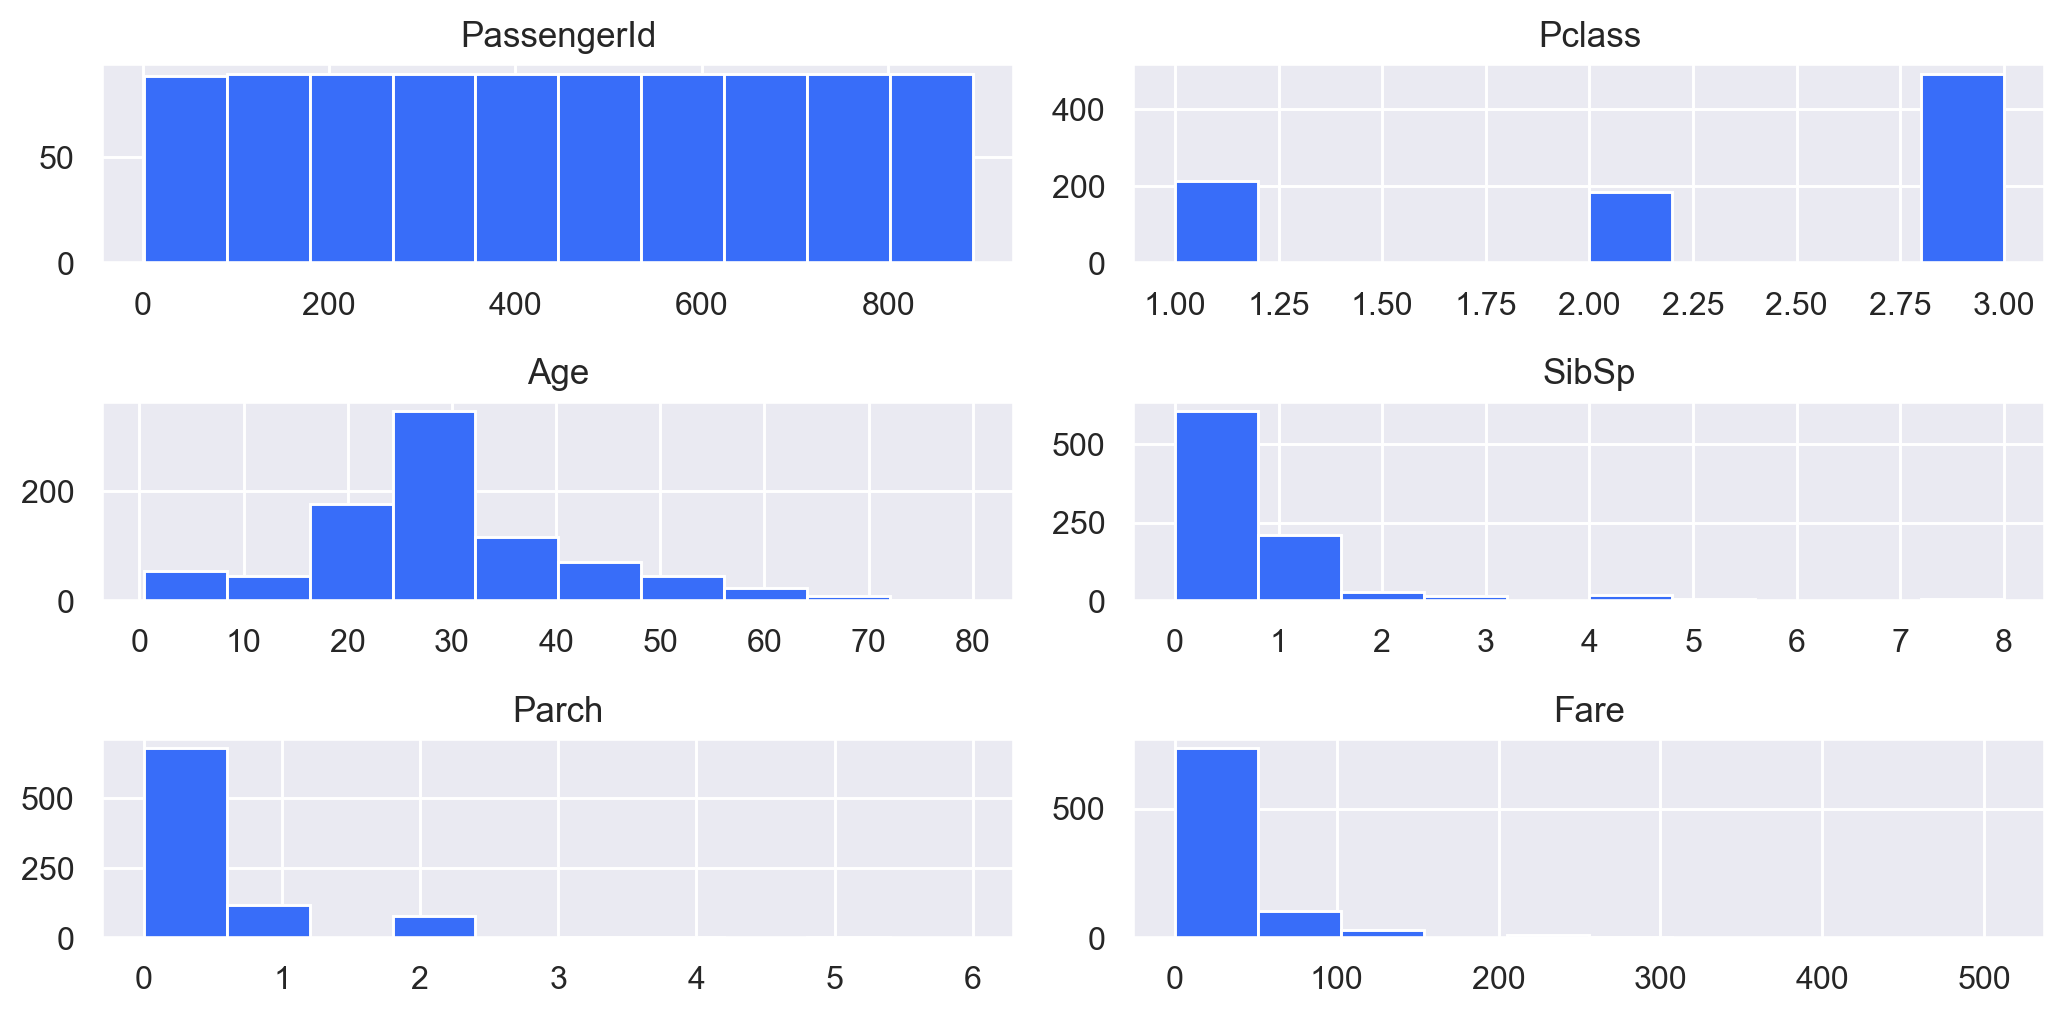

In [62]:
training_data.hist()
plt.tight_layout()

<Axes: >

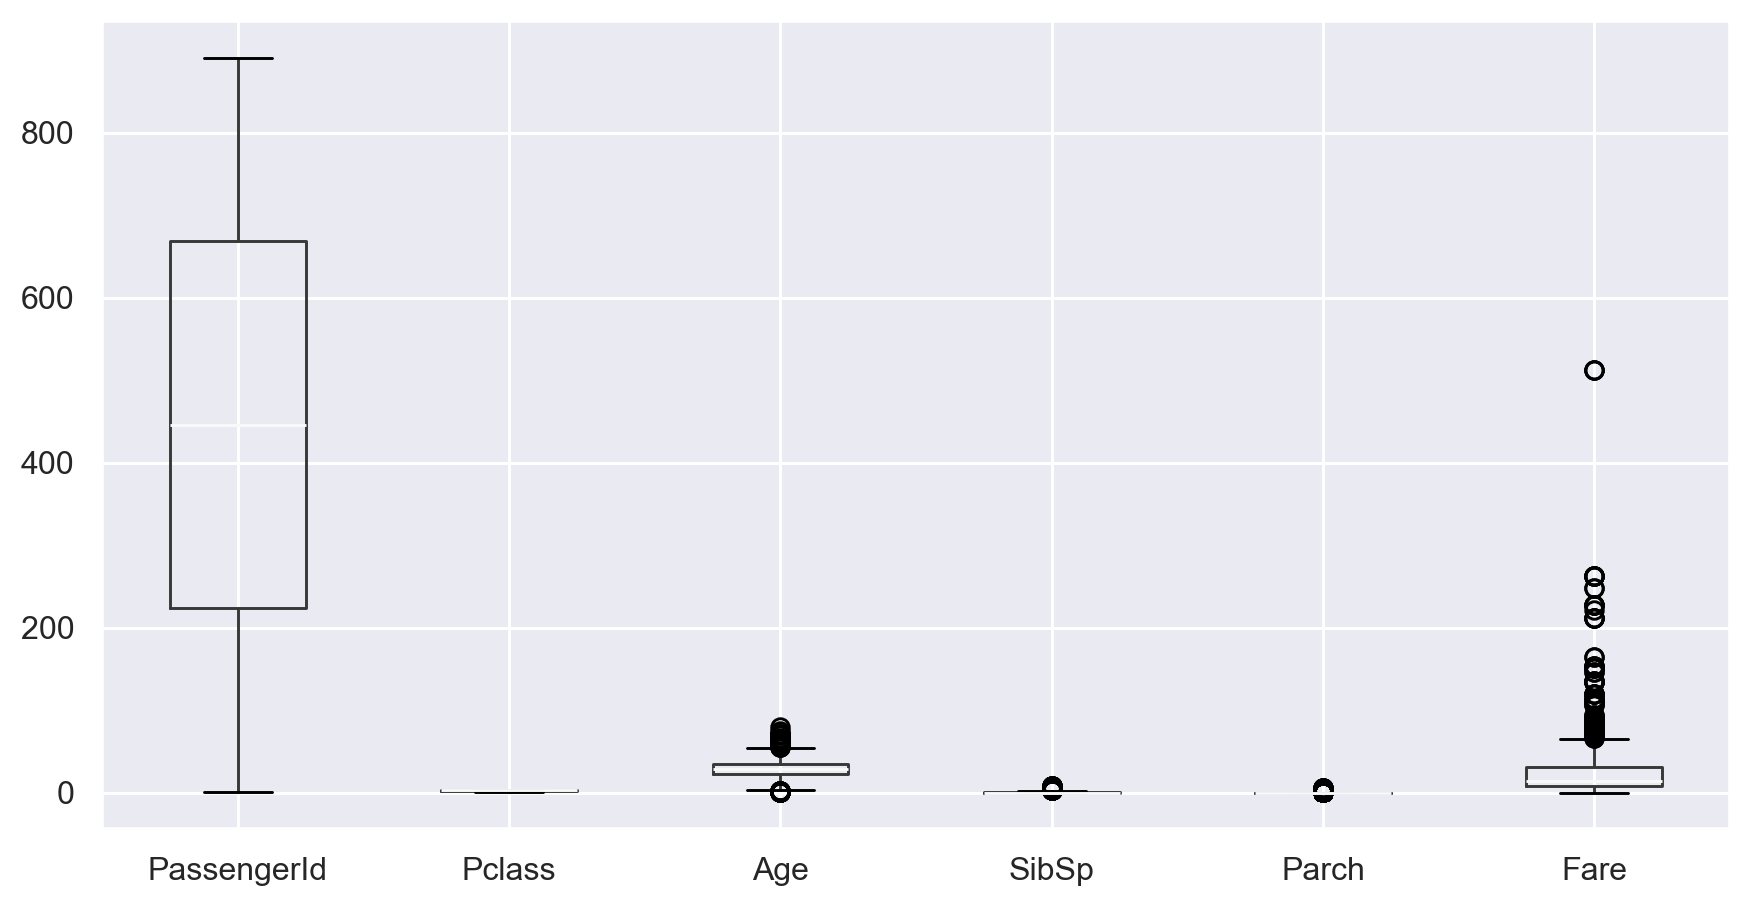

In [63]:
training_data.boxplot()

In [67]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower,data[col]))

In [73]:
training_data.select_dtypes(float).columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare'], dtype='object')

In [74]:
outlier_detection(training_data,training_data.select_dtypes(float).columns)

In [75]:
outlier_detection(training_data,training_data.select_dtypes(int).columns)

<Axes: >

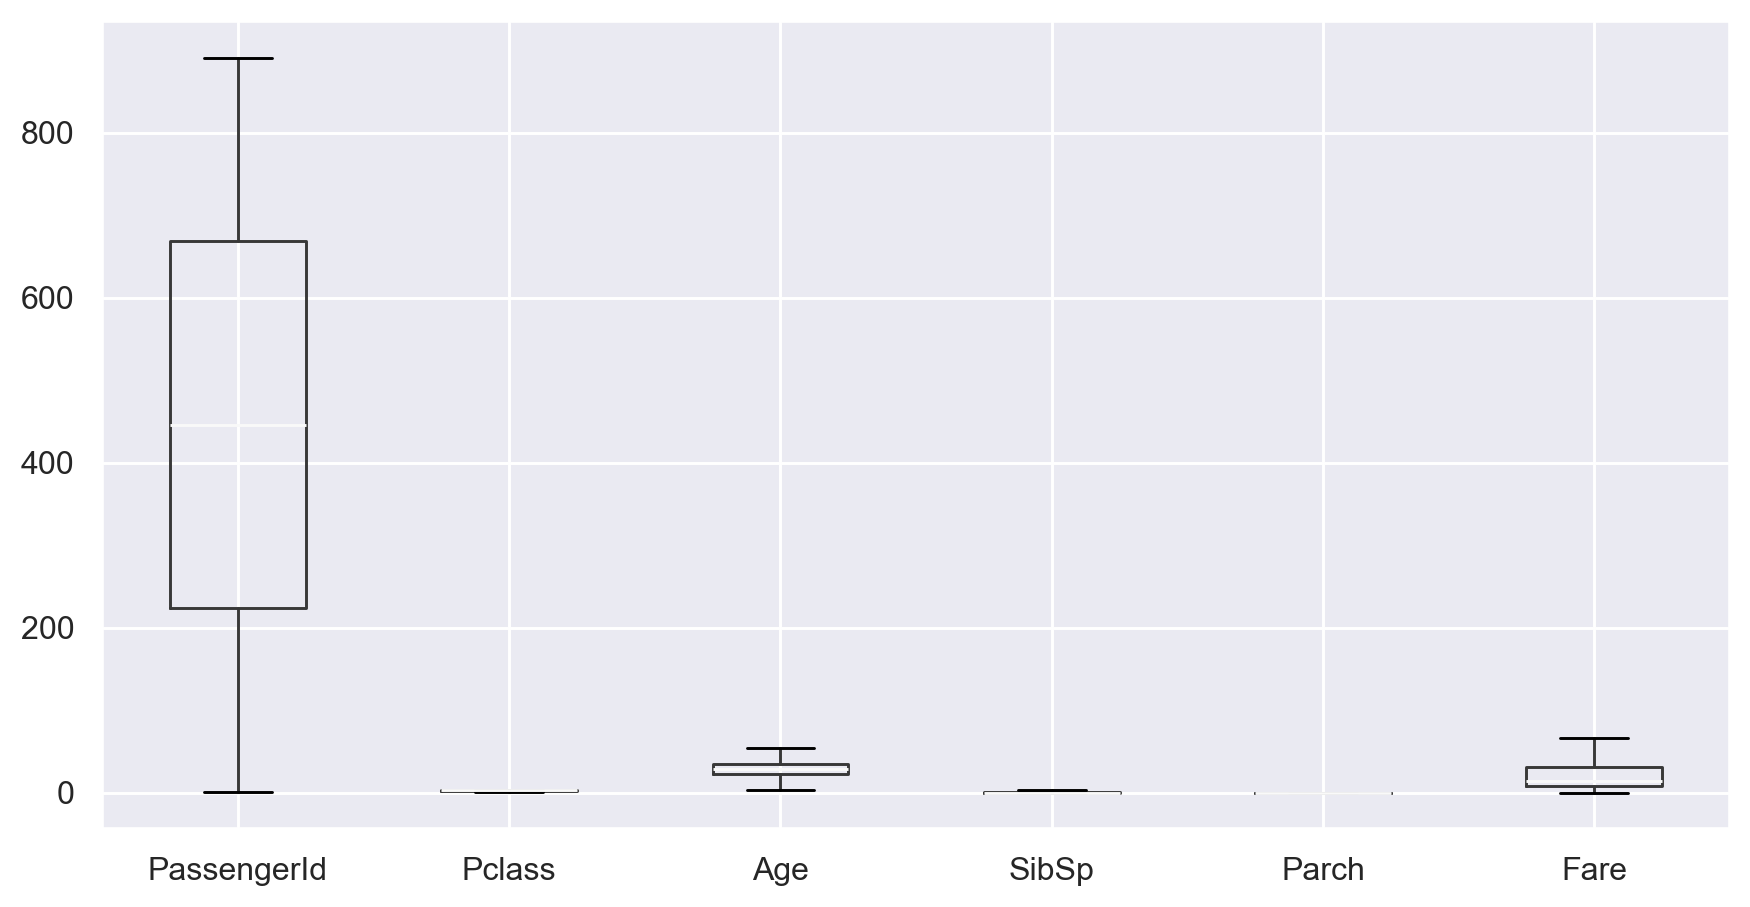

In [77]:
training_data.boxplot()

<Axes: >

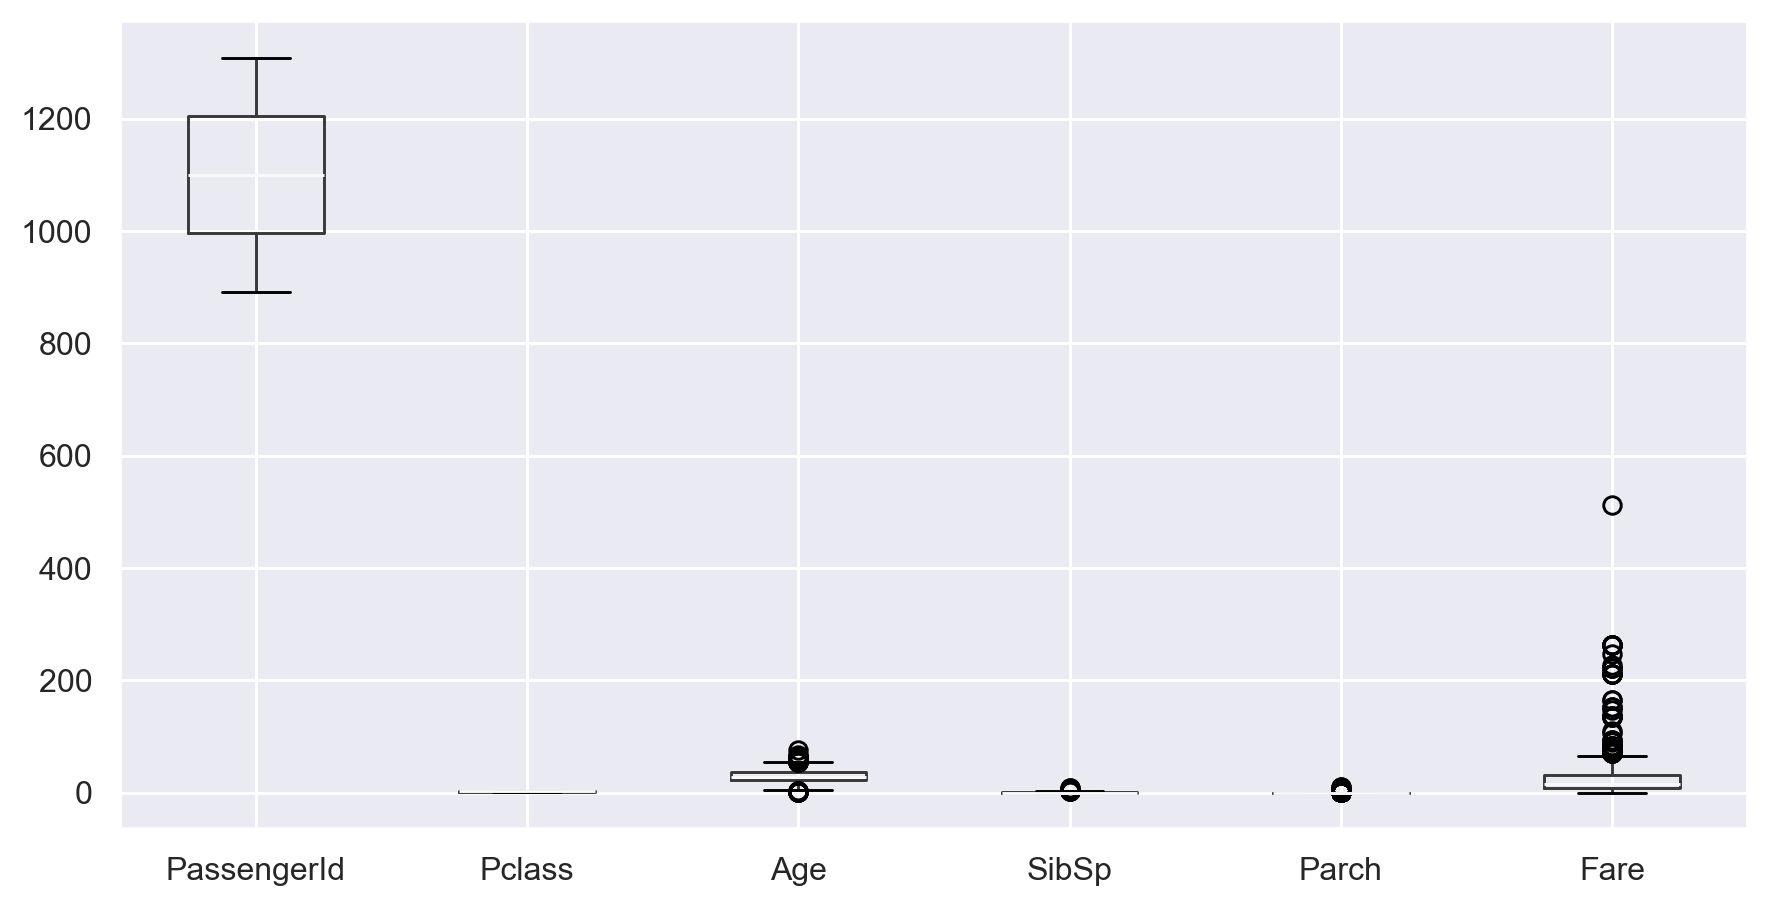

In [78]:
testing_data.boxplot()

In [79]:
outlier_detection(testing_data,testing_data.select_dtypes(float).columns)

In [80]:
outlier_detection(testing_data,testing_data.select_dtypes(int).columns)

<Axes: >

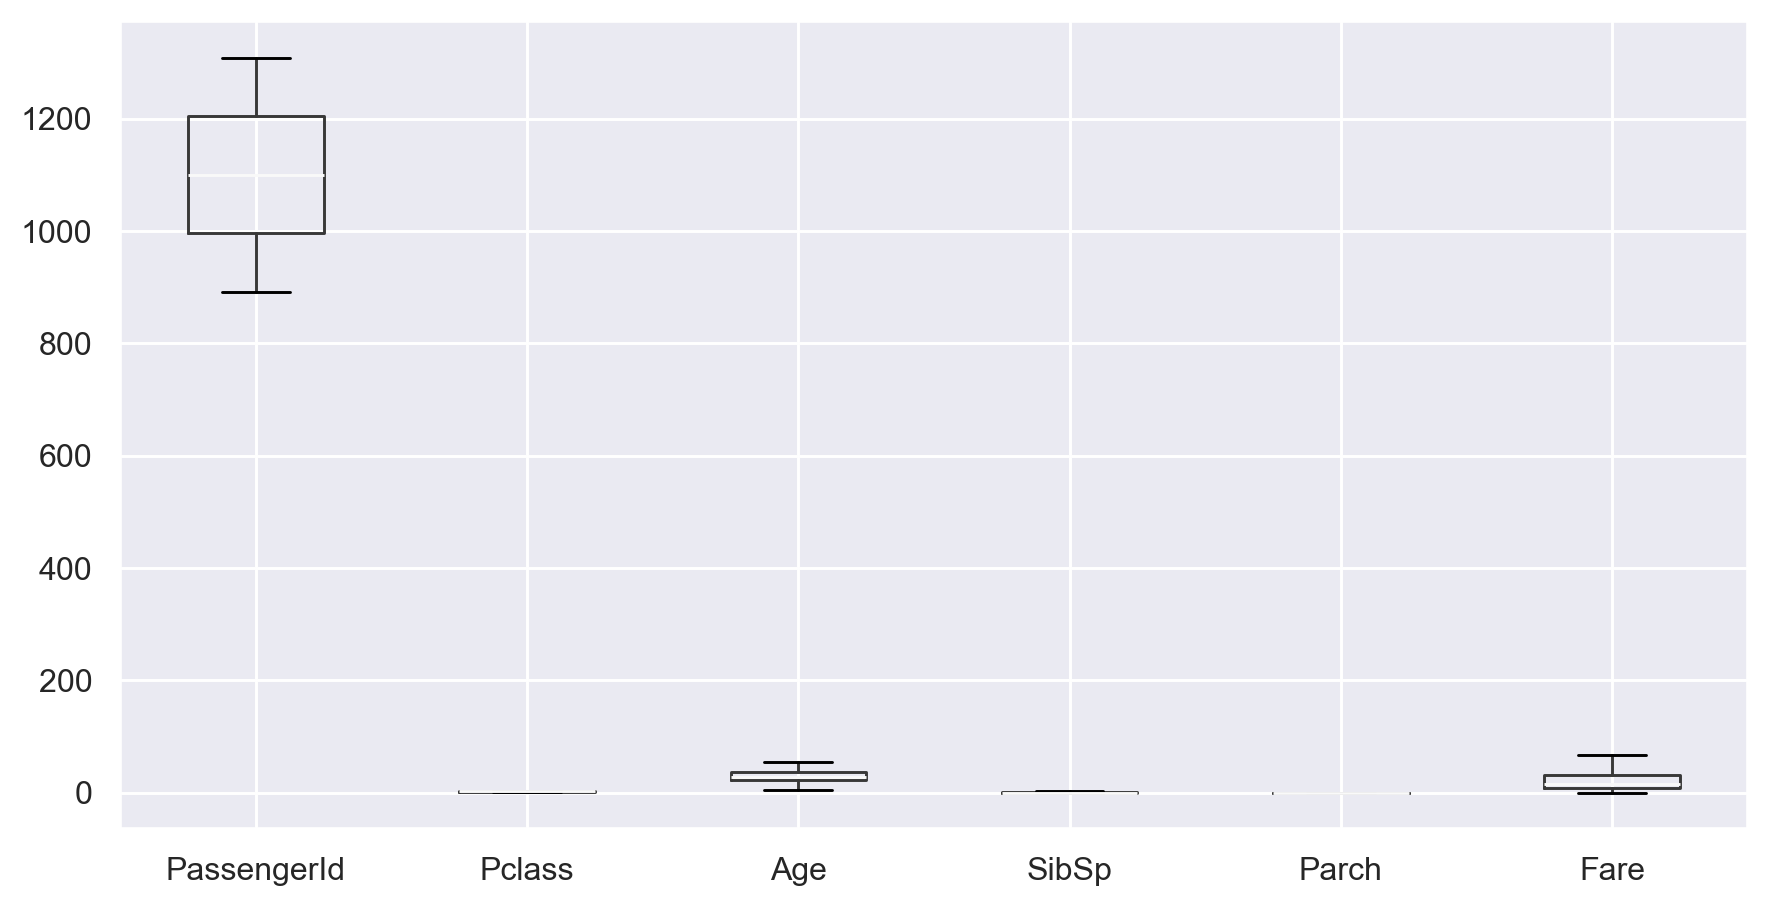

In [81]:
testing_data.boxplot()

Have dealt with all the outliers in both training and testing data.

Scatterplot and Correlation

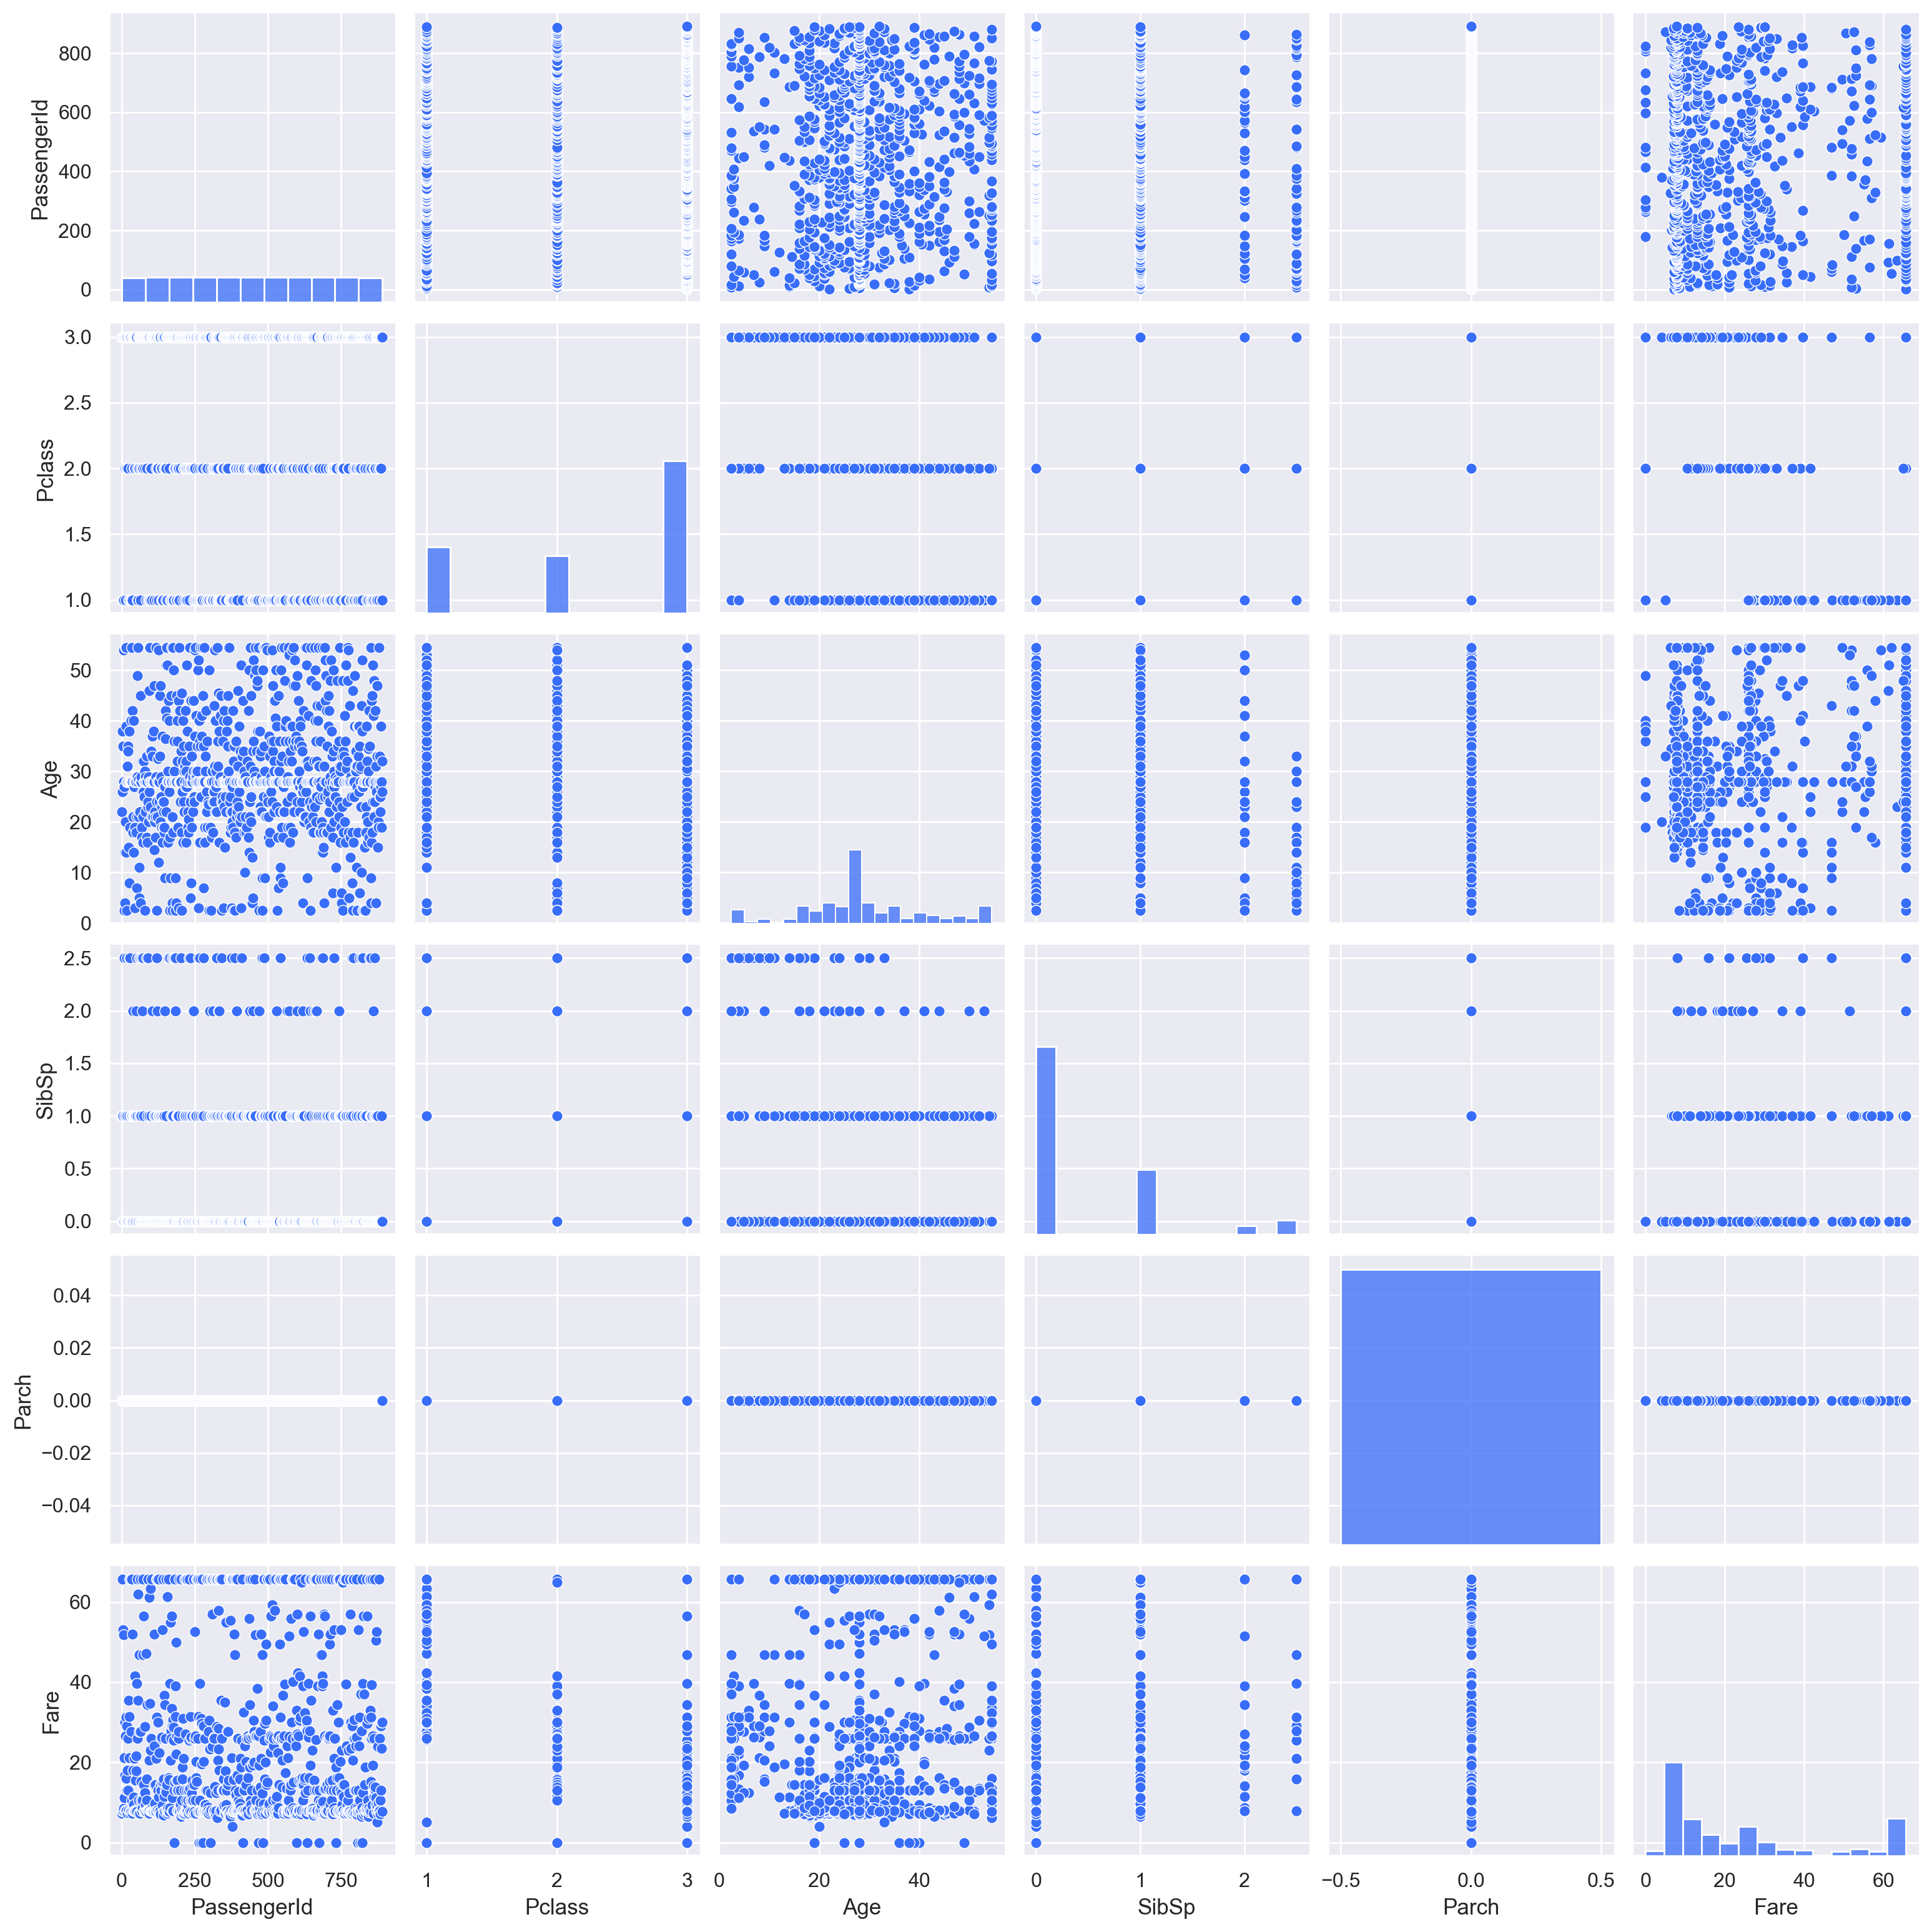

In [82]:
sns.pairplot(training_data)

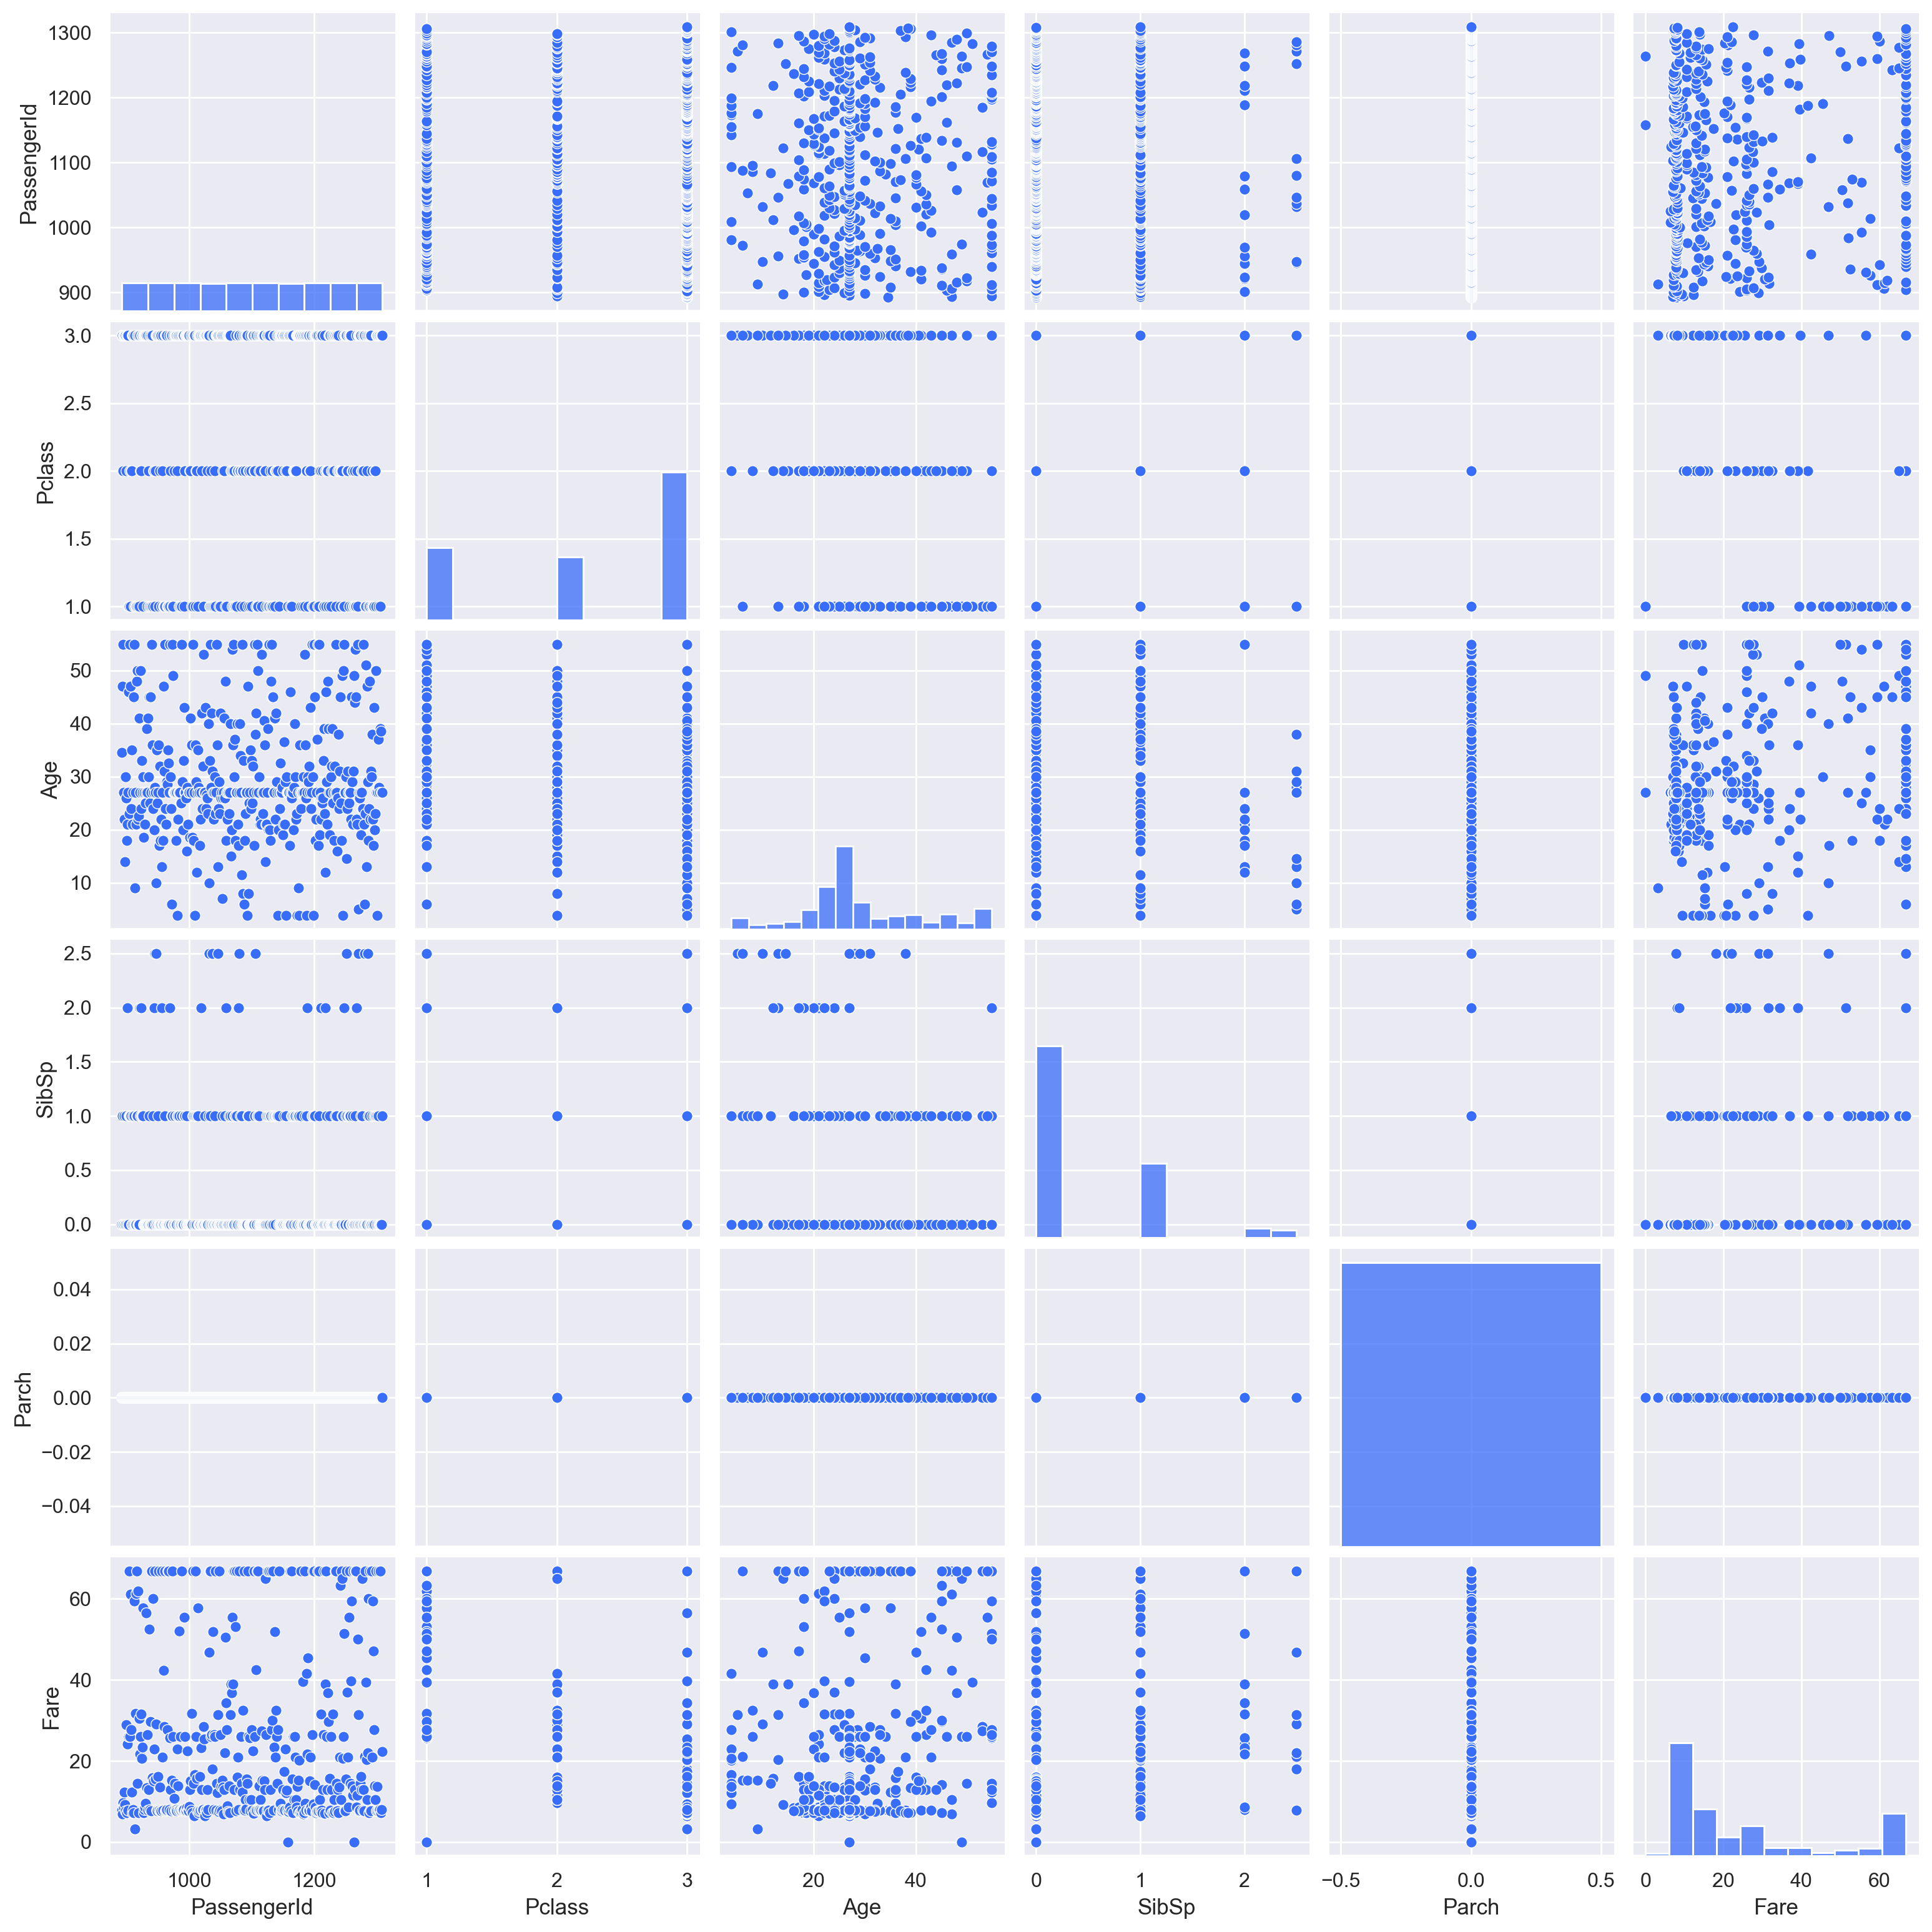

In [83]:
sns.pairplot(testing_data)

In [84]:
training_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035330,0.034529,-0.072990,NaN,0.003266
Pclass,-0.035330,1.000000,-0.337257,0.021124,NaN,-0.713413
Age,0.034529,-0.337257,1.000000,-0.246668,NaN,0.139065
SibSp,-0.072990,0.021124,-0.246668,1.000000,NaN,0.354126
Parch,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.003266,-0.713413,0.139065,0.354126,NaN,1.000000


<Axes: >

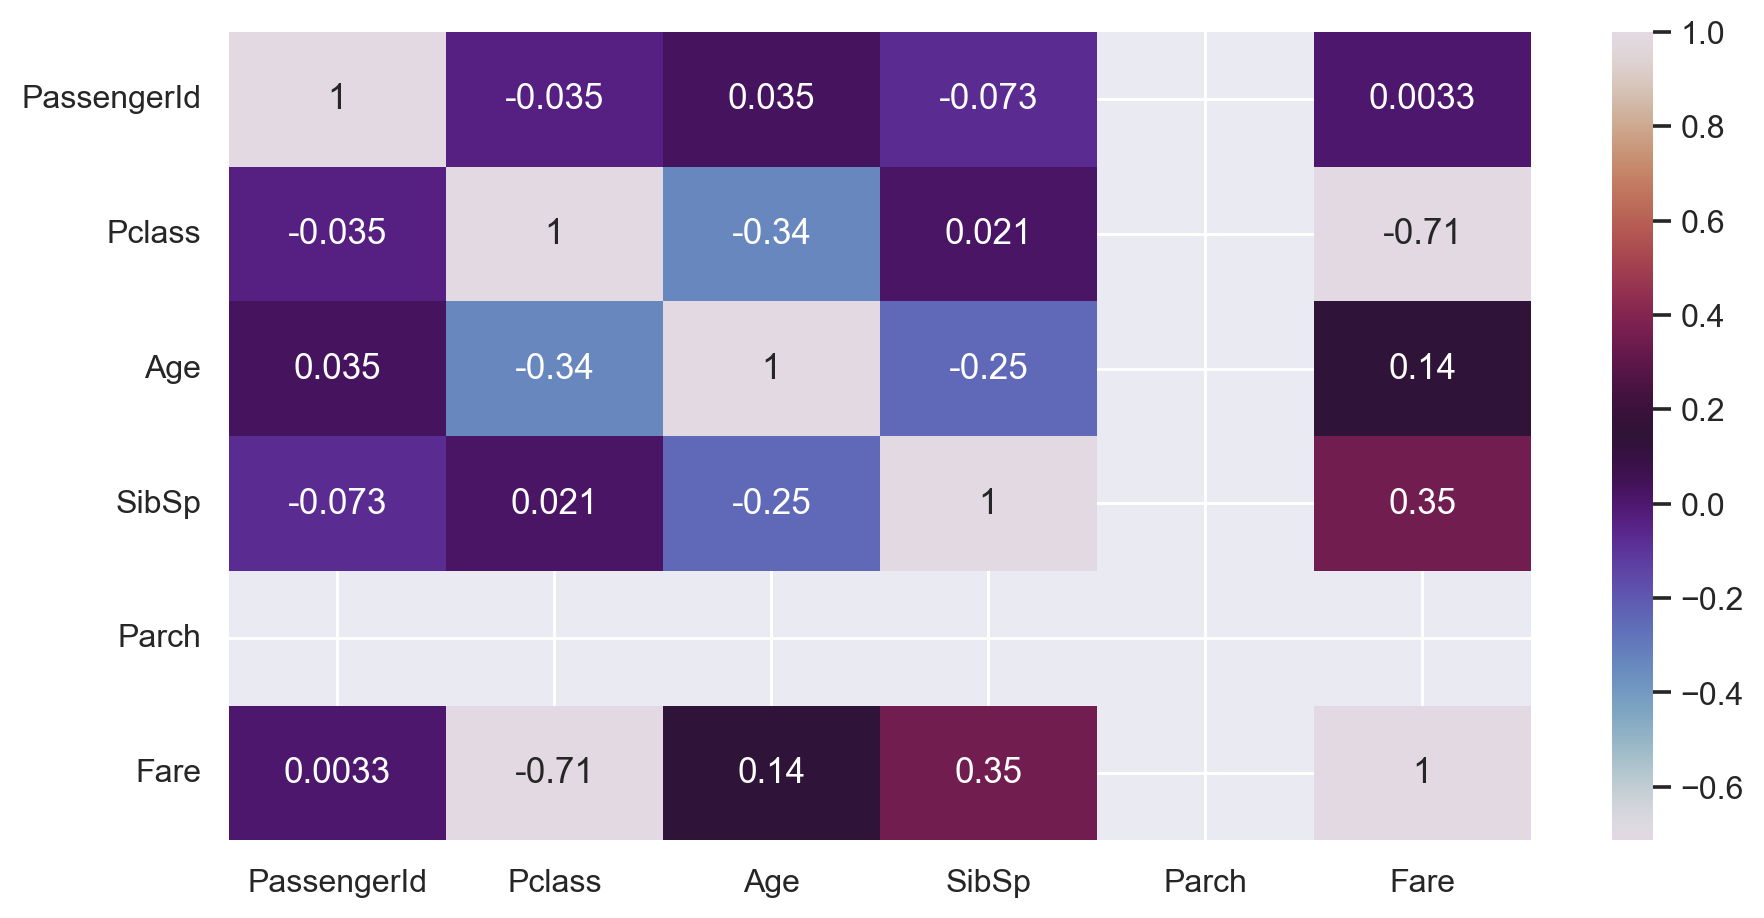

In [85]:
sns.heatmap(training_data.corr(),annot=True,cmap='twilight')

In [86]:
testing_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.018838,-0.012534,NaN,0.049771
Pclass,-0.026751,1.000000,-0.470951,-0.064610,NaN,-0.748755
Age,-0.018838,-0.470951,1.000000,-0.043117,NaN,0.350319
SibSp,-0.012534,-0.064610,-0.043117,1.000000,NaN,0.331912
Parch,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.049771,-0.748755,0.350319,0.331912,NaN,1.000000


<Axes: >

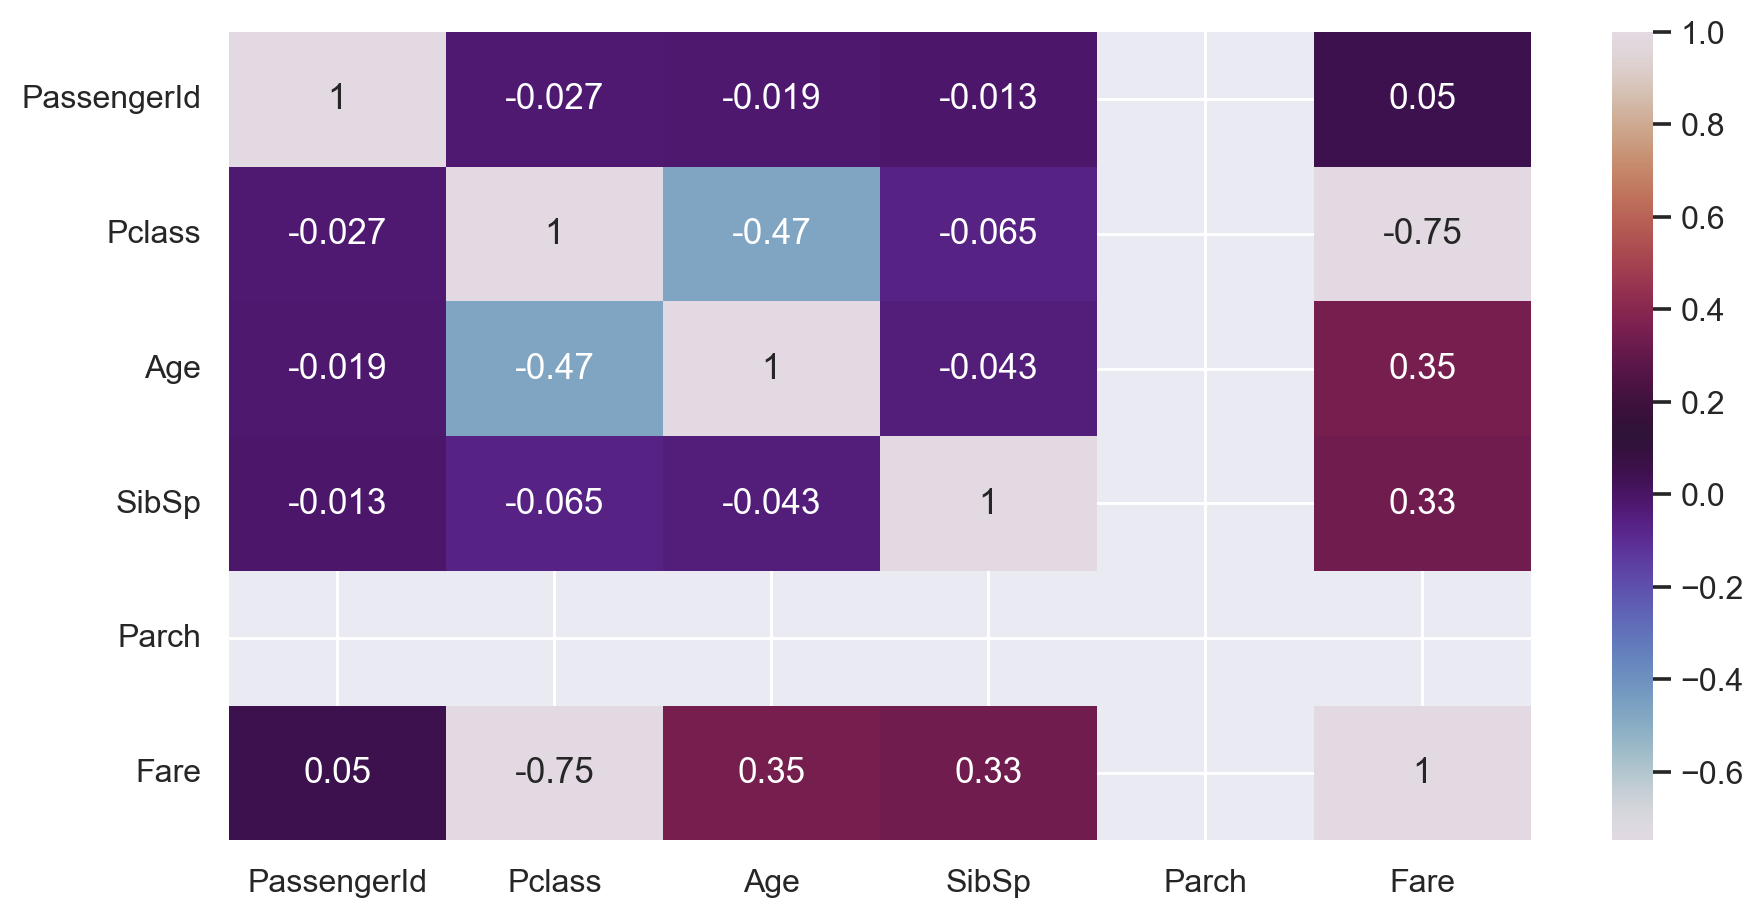

In [88]:
sns.heatmap(testing_data.corr(),annot=True,cmap='twilight')

Encoding

In [89]:
training_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6563,C
2,3.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,S
887,888.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,S
888,889.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,0.0,W./C. 6607,23.4500,S
889,890.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C


'Name' and 'Ticket' columns are having all the different values, also they are not much going to affect the result, there fore will remove both of those columns, and will encode 'Sex' and 'Embarked' column.

In [92]:
training_data.drop(columns = ['Name', 'Ticket'], inplace = True)

In [93]:
training_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,2.0,1.0,female,38.0,1.0,0.0,65.6563,C
2,3.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,4.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,5.0,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887.0,2.0,male,27.0,0.0,0.0,13.0000,S
887,888.0,1.0,female,19.0,0.0,0.0,30.0000,S
888,889.0,3.0,female,28.0,1.0,0.0,23.4500,S
889,890.0,1.0,male,26.0,0.0,0.0,30.0000,C


In [94]:
from sklearn.preprocessing import OrdinalEncoder

In [95]:
oe = OrdinalEncoder()

In [97]:
cat_cols = training_data.select_dtypes(object).columns          #to choose all the text column at once 
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [99]:
training_data[cat_cols]

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [102]:
training_data[cat_cols] = oe.fit_transform(training_data[cat_cols])

In [103]:
training_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,0.0,38.0,1.0,0.0,65.6563,0.0
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
887,888.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
888,889.0,3.0,0.0,28.0,1.0,0.0,23.4500,2.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


In [104]:
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892.0,3.0,"Kelly, Mr. James",male,34.500,0.0,0.0,330911,7.829200,Q
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1.0,0.0,363272,7.000000,S
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,54.875,0.0,0.0,240276,9.687500,Q
3,895.0,3.0,"Wirz, Mr. Albert",male,27.000,0.0,0.0,315154,8.662500,S
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1.0,0.0,3101298,12.287500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,"Spector, Mr. Woolf",male,27.000,0.0,0.0,A.5. 3236,8.050000,S
414,1306.0,1.0,"Oliva y Ocana, Dona. Fermina",female,39.000,0.0,0.0,PC 17758,66.835988,C
415,1307.0,3.0,"Saether, Mr. Simon Sivertsen",male,38.500,0.0,0.0,SOTON/O.Q. 3101262,7.250000,S
416,1308.0,3.0,"Ware, Mr. Frederick",male,27.000,0.0,0.0,359309,8.050000,S


In [105]:
testing_data.drop(columns = ['Name', 'Ticket'], inplace = True)

In [106]:
testing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892.0,3.0,male,34.500,0.0,0.0,7.829200,Q
1,893.0,3.0,female,47.000,1.0,0.0,7.000000,S
2,894.0,2.0,male,54.875,0.0,0.0,9.687500,Q
3,895.0,3.0,male,27.000,0.0,0.0,8.662500,S
4,896.0,3.0,female,22.000,1.0,0.0,12.287500,S
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,male,27.000,0.0,0.0,8.050000,S
414,1306.0,1.0,female,39.000,0.0,0.0,66.835988,C
415,1307.0,3.0,male,38.500,0.0,0.0,7.250000,S
416,1308.0,3.0,male,27.000,0.0,0.0,8.050000,S


In [107]:
cat_cols = testing_data.select_dtypes(object).columns          #to choose all the text column at once 
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [108]:
testing_data[cat_cols]

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [109]:
testing_data[cat_cols] = oe.fit_transform(testing_data[cat_cols])

In [110]:
testing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892.0,3.0,1.0,34.500,0.0,0.0,7.829200,1.0
1,893.0,3.0,0.0,47.000,1.0,0.0,7.000000,2.0
2,894.0,2.0,1.0,54.875,0.0,0.0,9.687500,1.0
3,895.0,3.0,1.0,27.000,0.0,0.0,8.662500,2.0
4,896.0,3.0,0.0,22.000,1.0,0.0,12.287500,2.0
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,27.000,0.0,0.0,8.050000,2.0
414,1306.0,1.0,0.0,39.000,0.0,0.0,66.835988,0.0
415,1307.0,3.0,1.0,38.500,0.0,0.0,7.250000,2.0
416,1308.0,3.0,1.0,27.000,0.0,0.0,8.050000,2.0


Scaling

In [112]:
xtrain = training_data.iloc[:,0:7]
xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,0.0,38.0,1.0,0.0,65.6563
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,0.0,19.0,0.0,0.0,30.0000
888,889.0,3.0,0.0,28.0,1.0,0.0,23.4500
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [113]:
ytrain = training_data['Embarked']
ytrain

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embarked, Length: 889, dtype: float64

In [115]:
xtest = testing_data.iloc[:,0:7]
xtest

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892.0,3.0,1.0,34.500,0.0,0.0,7.829200
1,893.0,3.0,0.0,47.000,1.0,0.0,7.000000
2,894.0,2.0,1.0,54.875,0.0,0.0,9.687500
3,895.0,3.0,1.0,27.000,0.0,0.0,8.662500
4,896.0,3.0,0.0,22.000,1.0,0.0,12.287500
...,...,...,...,...,...,...,...
413,1305.0,3.0,1.0,27.000,0.0,0.0,8.050000
414,1306.0,1.0,0.0,39.000,0.0,0.0,66.835988
415,1307.0,3.0,1.0,38.500,0.0,0.0,7.250000
416,1308.0,3.0,1.0,27.000,0.0,0.0,8.050000


In [117]:
ytest = testing_data['Embarked']
ytest

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
413    2.0
414    0.0
415    2.0
416    2.0
417    0.0
Name: Embarked, Length: 418, dtype: float64

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc = StandardScaler()

In [120]:
xtrain = sc.fit_transform(xtrain)
xtrain

array([[-1.73250451,  0.82520863,  0.73534203, ...,  0.80828635,
         0.        , -0.81878364],
       [-1.72861124, -1.57221121, -1.35991138, ...,  0.80828635,
         0.        ,  2.04377756],
       [-1.72471797,  0.82520863, -1.35991138, ..., -0.60343578,
         0.        , -0.7857011 ],
       ...,
       [ 1.72471797,  0.82520863, -1.35991138, ...,  0.80828635,
         0.        , -0.02480266],
       [ 1.72861124, -1.57221121,  0.73534203, ..., -0.60343578,
         0.        ,  0.29622052],
       [ 1.73250451,  0.82520863,  0.73534203, ..., -0.60343578,
         0.        , -0.79427805]])

In [121]:
xtest= sc.fit_transform(xtest)
xtest

array([[-1.72791209,  0.87348191,  0.75592895, ..., -0.6222717 ,
         0.        , -0.79436619],
       [-1.71962474,  0.87348191, -1.32287566, ...,  0.94938734,
         0.        , -0.83353932],
       [-1.71133739, -0.31581919,  0.75592895, ..., -0.6222717 ,
         0.        , -0.70657622],
       ...,
       [ 1.71133739,  0.87348191,  0.75592895, ..., -0.6222717 ,
         0.        , -0.8217288 ],
       [ 1.71962474,  0.87348191,  0.75592895, ..., -0.6222717 ,
         0.        , -0.78393513],
       [ 1.72791209,  0.87348191,  0.75592895, ...,  0.94938734,
         0.        , -0.10798121]])

Now our data is ready to build the model.

Model Building

In [122]:
LGBM = GradientBoostingClassifier()

In [123]:
LGBM.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [124]:
ypred = LGBM.predict(xtest)
ypred

array([1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 0., 0., 0., 0., 0., 2., 0., 2., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0.,
       2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 0., 2., 2., 2., 2., 0.,
       2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 0., 0., 2., 2.,
       2., 2., 1., 2., 2.

In [126]:
print(f'Training Accuracy: {LGBM.score(xtrain, ytrain)}')
print(f'Testing Accuracy : {LGBM.score(xtest, ytest)}')

Training Accuracy: 0.9381327334083239
Testing Accuracy : 0.6339712918660287


In [127]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.51      0.34      0.41       102
         1.0       0.21      0.09      0.12        46
         2.0       0.68      0.84      0.75       270

    accuracy                           0.63       418
   macro avg       0.47      0.42      0.43       418
weighted avg       0.59      0.63      0.60       418



It is not giving us good result bcz we have to give ideal value for learning rate (Alpha Parameter).

We will find best values for models, learning rate and max depth via GridSearchCV

In [177]:
GradientBoostingClassifier() 

GradientBoostingClassifier()

In [178]:
params = { 'n_estimators' : [90, 110], 'learning_rate' : [0.8,1,1.2,1.5], 'max_depth' : [3,5,7]}

In [179]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid = params, verbose = 1)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.8, 1, 1.2, 1.5],
                         'max_depth': [3, 5, 7], 'n_estimators': [90, 110]},
             verbose=1)

In [180]:
grid.best_params_

{'learning_rate': 0.8, 'max_depth': 7, 'n_estimators': 90}

In [181]:
LGBM = GradientBoostingClassifier(learning_rate = 0.8, max_depth = 7, n_estimators = 90)

In [182]:
LGBM.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.8, max_depth=7, n_estimators=90)

In [183]:
ypred = LGBM.predict(xtest)
ypred

array([1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 0., 2., 2.,
       2., 1., 2., 0., 1., 0., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 2., 0.,
       2., 2., 2., 0., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       0., 2., 2., 2., 1., 2., 0., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 0., 1., 2., 2., 2., 2.,
       2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 0., 0., 2., 0., 2., 2., 0.,
       2., 0., 2., 2., 0., 2., 0., 1., 2., 2., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 0., 2., 2.,
       2., 2., 1., 2., 2.

In [184]:
print(f'Training Accuracy: {LGBM.score(xtrain, ytrain)}')
print(f'Testing Accuracy : {LGBM.score(xtest, ytest)}')

Training Accuracy: 1.0
Testing Accuracy : 0.6028708133971292


In [186]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.45      0.27      0.34       102
         1.0       0.17      0.09      0.11        46
         2.0       0.66      0.81      0.73       270

    accuracy                           0.60       418
   macro avg       0.43      0.39      0.40       418
weighted avg       0.56      0.60      0.57       418



We are still not getting the generalize model with the Gradient Boosting. So, now let's try Xtreme Gradient Boosting.

In [187]:
XGBM = XGBClassifier()

In [188]:
XGBM.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [189]:
ypred = XGBM.predict(xtest)
ypred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2,

In [191]:
print(f'Training Accuracy: {XGBM.score(xtrain, ytrain)}')
print(f'Testing Accuracy : {XGBM.score(xtest, ytest)}')

Training Accuracy: 1.0
Testing Accuracy : 0.6267942583732058


In [192]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.49      0.33      0.40       102
         1.0       0.21      0.07      0.10        46
         2.0       0.67      0.83      0.75       270

    accuracy                           0.63       418
   macro avg       0.46      0.41      0.41       418
weighted avg       0.58      0.63      0.59       418



For XGBClassifier also , we have to choose ideal value for learning rate. So, we have to use GridSerchCV and do HyperParameter Tuning.

In [193]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [220]:
params = { 'n_estimators' : [90, 110, 150], 'learning_rate' : [0.2,0.3,0.4,0.5], 'max_depth' : [3,5,7,11], 'reg_lambda' : [1,2,3,4]}

In [221]:
grid = GridSearchCV(XGBClassifier(), param_grid = params, verbose = 1)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150],
                         'reg_lambda': [1, 2, 3, 4]},
             verbose=1)

In [222]:
grid.best_params_

{'learning_rate': 0.4, 'max_depth': 11, 'n_estimators': 90, 'reg_lambda': 2}

In [223]:
XGBM = XGBClassifier(learning_rate= 0.4, max_depth= 11, n_estimators= 90, reg_lambda= 2)

In [224]:
XGBM.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [225]:
ypred = XGBM.predict(xtest)
ypred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2,

In [226]:
print(f'Training Accuracy: {XGBM.score(xtrain, ytrain)}')
print(f'Testing Accuracy : {XGBM.score(xtest, ytest)}')

Training Accuracy: 1.0
Testing Accuracy : 0.645933014354067


In [227]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.54      0.33      0.41       102
         1.0       0.23      0.07      0.10        46
         2.0       0.68      0.86      0.76       270

    accuracy                           0.65       418
   macro avg       0.48      0.42      0.43       418
weighted avg       0.60      0.65      0.60       418

